## Problem 1

In [10]:
from matplotlib import pyplot as plt
from sympy import *
import sympy as sy
import numpy as np
import math

x = sy.symbols('x')
expr = (sin(x)+1)**(sin(cos(x)))
f = sy.diff((sin(x)+1)**(sin(cos(x))),x)

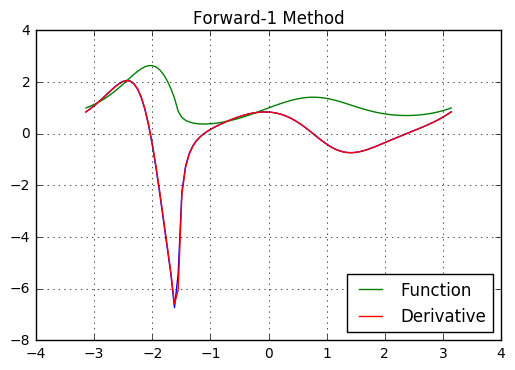

In [11]:
x_val = np.linspace(-np.pi,np.pi,100)

y_val1 = np.zeros(len(x_val))
y_val2 = np.zeros(len(x_val))
for i in range(len(x_val)):
    y_val1[i] = expr.subs(x, x_val[i])
    y_val2[i] = f.subs(x,x_val[i])
plt.plot(x_val, y_val1, label="Function")
plt.plot(x_val,y_val2, label="Derivative")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Problem 2

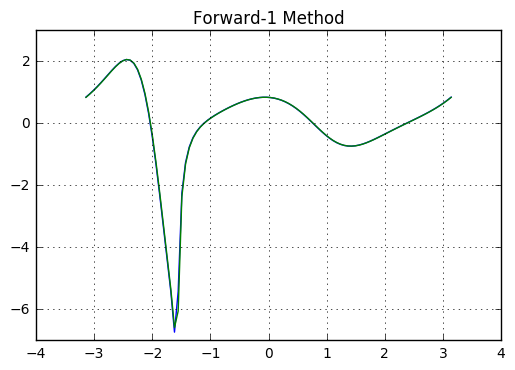

Error: 0.699765645035


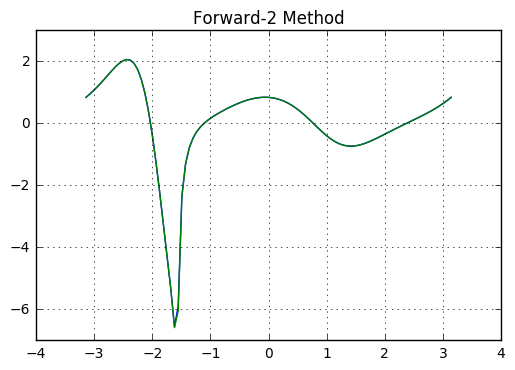

Error: 0.164613875615


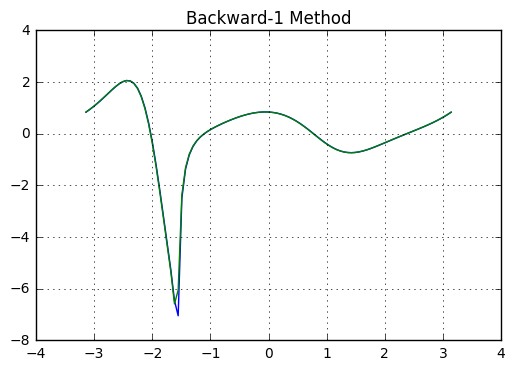

Error: 1.03575695162


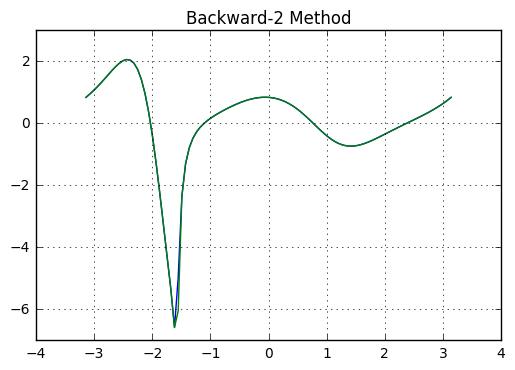

Error: 1.07020854621


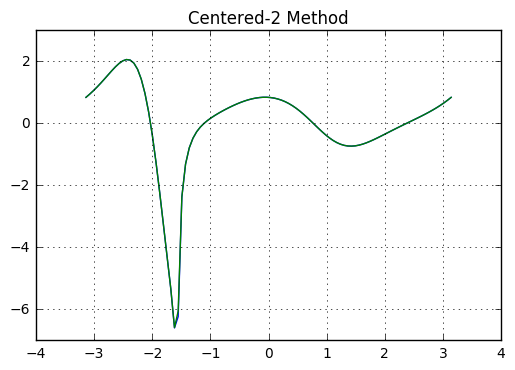

Error: 0.179705891601


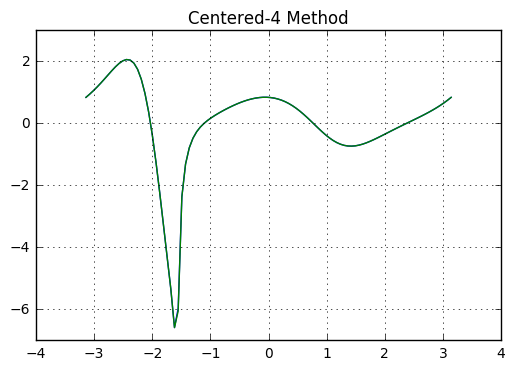

Error: 0.0857458554292


In [12]:
f = lambda x: (math.sin(x)+1)**(math.sin(math.cos(x)))
x = np.linspace(-np.pi,np.pi,100)

#Forward 1 Method
def forward1(f, x, h):
    deriv = []
    for x_val in x:
        deriv.append((f(x_val+h)-f(x_val))/h)
    return deriv

y_val = forward1(f,x,h=0.01)
plt.plot(x, y_val)
plt.title("Forward-1 Method")
plt.plot(x_val, y_val2)
plt.grid()
plt.show()
print("Error: " + str(np.linalg.norm(y_val-y_val2)))

#Forward 2 Method
def forward2(f, x, h):
    deriv = []
    for x_val in x:
        deriv.append((4*f(x_val+h)-3*f(x_val)-f(x_val+2*h))/(2*h))
    return deriv

y_val = forward2(f,x,h=0.01)
plt.plot(x, y_val)
plt.plot(x_val, y_val2)
plt.title("Forward-2 Method")
plt.grid()
plt.show()
print("Error: " + str(np.linalg.norm(y_val-y_val2)))

#Backward 1 Method
def backward1(f, x, h):
    deriv = []
    for x_val in x:
        deriv.append((f(x_val)-f(x_val-h))/h)
    return deriv

y_val = backward1(f,x,h=0.01)
plt.plot(x, y_val)
plt.plot(x_val, y_val2)
plt.title("Backward-1 Method")
plt.grid()
plt.show()
print("Error: " + str(np.linalg.norm(y_val-y_val2)))

#Backward 2 Method
def backward2(f, x, h):
    deriv = []
    for x_val in x:
        deriv.append((3*f(x_val)-4*f(x_val-h)+f(x_val-2*h))/(2*h))
    return deriv

y_val = backward2(f,x,h=0.01)
plt.plot(x, y_val)
plt.plot(x_val, y_val2)
plt.title("Backward-2 Method")
plt.grid()
plt.show()
print("Error: " + str(np.linalg.norm(y_val-y_val2)))

#Centered 2 Method
def centered2(f, x, h):
    deriv = []
    for x_val in x:
        deriv.append((f(x_val+h)-f(x_val-h))/(2*h))
    return deriv

y_val = centered2(f,x,h=0.01)
plt.plot(x, y_val)
plt.plot(x_val, y_val2)
plt.title("Centered-2 Method")
plt.grid()
plt.show()
print("Error: " + str(np.linalg.norm(y_val-y_val2)))

#Centered 4 Method
def centered4(f, x, h):
    deriv = []
    for x_val in x:
        deriv.append((f(x_val-2*h)-8*f(x_val-h)+8*f(x_val+h)-f(x_val+2*h))/(12*h))
    return deriv

y_val = centered4(f,x,h=0.01)
plt.plot(x, y_val)
plt.plot(x_val, y_val2)
plt.title("Centered-4 Method")
plt.grid()
plt.show()
print("Error: " + str(np.linalg.norm(y_val-y_val2)))

The Centered-4 approximation gives the closest aproximation to the true derivative (the two are actually indistinguishable on the graph).

## Problem 3

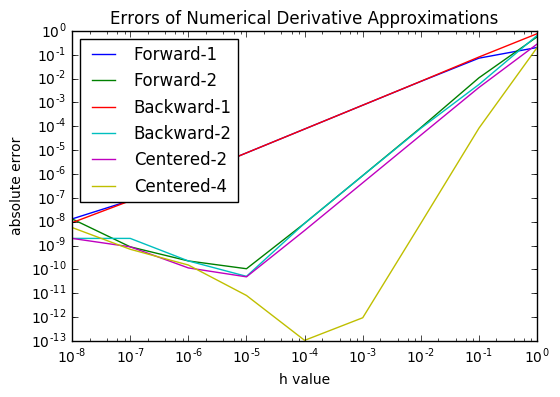

In [15]:
x = sy.symbols('x')
expr = (sin(x)+1)**(sin(cos(x)))
f_deriv = sy.diff((sin(x)+1)**(sin(cos(x))),x)
f_lambda = lambda x: (math.sin(x)+1)**(math.sin(math.cos(x)))

def exact_deriv(f_deriv, x_val):
    return f_deriv.subs(x,x_val)

h_val = np.logspace(-8,0,9)
x_val = 1.0
x_val_list = np.zeros((1,1))
x_val_list[0,0] = x_val


error = []
for h in h_val:
    exact = exact_deriv(f_deriv, x_val)
    approx = forward1(f_lambda, x_val_list, h)[0]
    error.append(abs(approx-exact))
plt.loglog(h_val, error, label="Forward-1")

error = []
for h in h_val:
    exact = exact_deriv(f_deriv, x_val)
    approx = forward2(f_lambda, x_val_list, h)[0]
    error.append(abs(approx-exact))
plt.loglog(h_val, error, label="Forward-2")

error = []
for h in h_val:
    exact = exact_deriv(f_deriv, x_val)
    approx = backward1(f_lambda, x_val_list, h)[0]
    error.append(abs(approx-exact))
plt.loglog(h_val, error, label="Backward-1")

error = []
for h in h_val:
    exact = exact_deriv(f_deriv, x_val)
    approx = backward2(f_lambda, x_val_list, h)[0]
    error.append(abs(approx-exact))
plt.loglog(h_val, error, label="Backward-2")

error = []
for h in h_val:
    exact = exact_deriv(f_deriv, x_val)
    approx = centered2(f_lambda, x_val_list, h)[0]
    error.append(abs(approx-exact))
plt.loglog(h_val, error, label="Centered-2")

error = []
for h in h_val:
    exact = exact_deriv(f_deriv, x_val)
    approx = centered4(f_lambda, x_val_list, h)[0]
    error.append(abs(approx-exact))
plt.loglog(h_val, error, label="Centered-4")

plt.legend(loc="upper left")
plt.xlabel("h value")
plt.ylabel("absolute error")
plt.title("Errors of Numerical Derivative Approximations")
plt.show()

## Problem 4

In [16]:
data = np.load('plane.npy')
t = data[:,0]
alpha = data[:,1]
beta = data[:,2]

alpha = np.deg2rad(alpha)
beta = np.deg2rad(beta)

x = 500*np.tan(beta)/(np.tan(beta)-np.tan(alpha))
y = 500*np.tan(alpha)*np.tan(beta)/(np.tan(beta)-np.tan(alpha))

x_veloc = np.zeros(len(x))
y_veloc = np.zeros(len(y))

t = 0
while t <= 7:
    if t == 0:
        x_veloc[t] = (x[t+1]-x[t])
        y_veloc[t] = (y[t+1] - y[t])
    elif t < 7:
        x_veloc[t] = (x[t+1]-x[t-1])/2
        y_veloc[t] = (y[t+1] - y[t-1])/2
    else:
        x_veloc[t] = (x[t]-x[t-1])
        y_veloc[t] = (y[t]-y[t-1])
    t += 1

veloc = np.sqrt(x_veloc**2 + y_veloc**2)
print(veloc)

[ 46.42420062  47.00103938  48.99880514  50.09944163  48.29035084
  51.56455905  53.92303355  51.51480057]


## Problem 5

In [116]:
#TODO

def jacobian(f, x0, h):
    n = np.shape(x0)[1]
    m = np.shape(f)[0]
    J = np.zeros((m,n))
    for i in range(m):
        J[:,i] = 
    
f1 = lambda x,y: x**2
f2 = lambda x,y: x**3 - y
f = np.array([[f1],[f2]])
x0 = np.array([1,2])

In [122]:
f1 = lambda x,y: x**2
f2 = lambda x,y: x**3 - y
f = np.array([[f1],[f2]])
x0 = np.array([1,2])
f[0](x0[0], x0[1])

TypeError: 'numpy.ndarray' object is not callable

## Problem 6

In [25]:
from autograd import grad
import autograd.numpy as anp 

#Sympy

x = sy.symbols('x')
expr = log(sqrt(sin(sqrt(x))))
print("Sympy")
%timeit f = sy.diff(expr,x)
f = sy.diff(expr,x)
f.subs(x,pi/4)
exact = f.subs(x,pi/4)
print(f.subs(x,pi/4))
print("error=0 (exact)")
print("")

#Autograd
f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
grad_f = grad(f)
x0 = anp.pi/4
print("Autograd")
%timeit grad_f(x0)
print(grad_f(x0))
print("error = " + str(float(abs(grad_f(x0)-exact))))
print("")

#Second Order Centered
f = lambda x: math.log(math.sqrt(math.sin(math.sqrt(x))))
x_val = math.pi/4
x_val_list = np.zeros((1,1))
x_val_list[0,0] = x_val
print("Second Order Centered")
%timeit centered2(f,x_val_list,0.001)
print(centered2(f,x_val_list,0.001)[0])
print("error = " + str(float(abs(centered2(f,x_val_list,0.01)[0]-exact))))

Sympy
1000 loops, best of 3: 298 µs per loop
cos(sqrt(pi)/2)/(2*sqrt(pi)*sin(sqrt(pi)/2))
error=0 (exact)

Autograd
1000 loops, best of 3: 218 µs per loop
0.230259011147
error = 2.7730013187490676e-18

Second Order Centered
The slowest run took 7.46 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.75 µs per loop
0.23025918292982062
error = 1.717994095001563e-05


## Problem 7

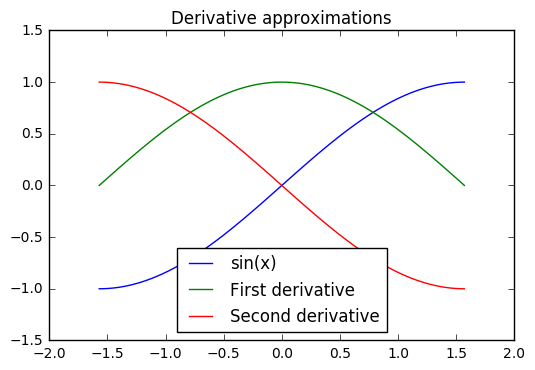

In [46]:
def taylor_sin(x, tol=.0001):
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
# Autograd's version of NumPy doesn't have the math attribute so use NumPy.
        cur_term = ((-1)**(i))*x**(2*i+1)/np.math.factorial(2*i+1)
        result += cur_term
        i += 1
    return result

d_taylor_sin = grad(taylor_sin)
d2_taylor_sin = grad(d_taylor_sin)

x = np.linspace(-math.pi/2,math.pi/2,100)
f = np.sin(x)
y1 = np.zeros(len(x))
y2 = np.zeros(len(x))
for i in range(len(x)):
    y1[i] = d_taylor_sin(x[i])
    y2[i] = d2_taylor_sin(x[i])

plt.plot(x,f,label="sin(x)")
plt.plot(x,y1,label="First derivative")
plt.plot(x,y2,label="Second derivative")
plt.legend(loc = "lower center")
plt.title("Derivative approximations")
plt.show()

## Problem 8

In [47]:
from autograd import elementwise_grad
from autograd import jacobian

In [49]:
#TODO FINISH

#Sympty Method


#Autograd Method
f = lambda x: anp.array([anp.exp(x[0])*anp.sin(x[1])+(x[1])**3],[3*x[1]-anp.cos(x[0])])
jacobian_f = jacobian(f)
%timeit jacobian_f(anp.array([1.,1.]))
                    

#Second ORder Center Method

TypeError: data type not understood